In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 01 :
**What are the different types of Activation Function used in Neural Networks? Briefly explain them.**

There are four commonly used activation functions.

i) **Sigmoid Function:** A mathematical function having a characteristic "S"-shaped curve or sigmoid curve. Its output ranges from 0 to 1. This can be defined by \\
$$g(z) = \frac{1}{1+e^{-z}}$$

ii) **Tanh Function:** This is a rescaled logistic sigmoid function. Its output ranges from -1 to 1. This can be defined by \\
$$g(z) = \frac{e^{z}+e^{-z}}{e^{z}-e^{-z}}$$

iii) **ReLU (Rectifier Linear Unit) Function:** Defined as the positive part of its argument where z is the input to a neuron. This can be defined by \\
$$g(z) = max(0, z)$$

iv) **Leaky ReLU (Rectifier Linear Unit) Function:** Leaky ReLUs are an attempt to fix the *dying ReLU* problem. Instead of the function being zero when x < 0, a leaky ReLU will instead have a small negative slope $\alpha$ . This can be defined by \\
$$g(z) = max(\alpha z, z)$$

# Task 02 :
**Why are activation funtions important in Neural Network and when do we use them?**

Importance of activation functions : 

i) **Introducing non-linearity :** Non-linear functions make back-propagation possible. Without non-linear function, back-propargation is useless. Back-propagation minimizes the error and enhances the accuracy or efficiency of the model. Moreover, without non-linearity logistic regression with deep neural network is useless. Briefly, it's nothing but logistic regression with extra steps and more time.

ii) **Thresholding during classification :** An activation function serves as a threshold, alternatively called classification or a partition.

# Task 03 :
**Given that for a two class problem, w1, w2 = [x1, x2] contains two feature vectors and
they are w1 = [(1,0), (0,1), (1,1)] & w2 = [(1,2), (0,3), (2,1)]. Implement the batch weight
update for 5 epochs. [Initially assume the weights are 0.1 and learning rate is 0.3].
N.B: Implement this without the help of any library.**

In [ ]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [ ]:
def propagate(w, b, X, Y):
    
    #forward propagation
    m = X.shape[1] #no of samples
    A = sigmoid(np.matmul(w.T, X)+ b) #activation
    cost = -1/m*np.sum(Y*np.log(A)+ (1-Y)*np.log(1-A)) #cost function

    #backward propagation
    dw = (1/m)*(np.matmul(X, (A-Y).T)) 
    db = (1/m)*np.sum(A-Y)

    return dw, db, cost

In [ ]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    for i in range(num_iterations):
        dw, db, cost = propagate(w, b, X, Y)

        #Weight Update
        w = w - learning_rate*dw
        b = b - learning_rate*db
        print ("Cost after iteration %i: %f" %(i+1, cost))

    return

In [ ]:
w = np.array([[.1],[.1]])
b = 0.1
X = np.array([[1.,0,1.,1.,0,2.],[0,1.,1.,2.,3.,1.]])
Y = np.array([[0,0,0,1,1,1]])
optimize(w, b, X, Y, num_iterations= 5, learning_rate = 0.3)

Cost after iteration 1: 0.664946
Cost after iteration 2: 0.650251
Cost after iteration 3: 0.638410
Cost after iteration 4: 0.628234
Cost after iteration 5: 0.619109


#Task 04:
**Install Tensorflow and load the Breast Cancer Dataset given to you.
N.B: The dataset is already split into training and testing sets.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, regularizers
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout
from keras.models import Model, Sequential
from keras.utils import normalize, to_categorical
import keras.backend as K

In [ ]:
X_train = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Machine Learning Lab/Lab 6/X_train.xlsx')
X_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251,-0.495052,1.487202,-0.514488,-0.491540,0.281498,-0.604512,-0.469007,-0.611700,0.057982,-0.357637,-1.043176,0.213533,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034
1,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471,-0.333818,0.759412,-0.287518,-0.421277,-0.162080,-0.204867,-0.050296,-0.203091,-0.254690,-0.391395,-0.715654,1.066842,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158
2,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221,-0.576726,-1.057845,-0.538560,-0.387089,-1.072119,-0.720575,-0.423628,-0.492190,-0.674844,-0.801473,0.297615,-0.977818,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443
3,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567,-0.128226,0.556222,-0.204001,-0.332347,-0.552851,-0.758881,-0.648914,0.601566,0.204548,-0.115963,-0.701325,-0.757927,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883
4,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939,-0.628828,-0.130929,-0.613234,-0.466581,-0.671490,-0.744016,-0.710063,-1.204498,-0.542935,-0.503025,-0.427026,1.058637,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1.330176,0.199096,1.197454,1.252698,-0.521129,-0.881910,-0.093733,0.252625,-0.947798,-1.865718,-0.261297,-0.705403,-0.227091,-0.074366,0.199824,-0.796044,-0.168733,0.506501,-0.149652,-0.780374,0.758192,-0.203276,0.649345,0.605735,-0.361014,-0.888328,-0.233135,0.229158,-0.535836,-1.467962
451,-0.467933,1.176375,-0.323157,-0.497297,1.609573,2.702147,1.799057,0.952923,0.806090,2.901339,-0.369374,0.718774,-0.386265,-0.342834,0.051260,2.693275,1.479076,0.453876,-0.321866,2.443477,-0.238701,2.484648,-0.277294,-0.289867,2.337996,5.270909,4.199765,1.633011,2.323247,6.968987
452,-1.324229,-0.200482,-1.317546,-1.048765,0.325493,-0.867634,-0.776990,-0.898197,-1.108571,1.016245,0.370968,0.068566,0.217023,-0.205664,-0.058930,-0.919426,-0.257238,-0.862603,-0.134995,-0.382572,-0.867133,-0.085125,-0.923429,-0.753887,0.037201,-0.960905,-0.767691,-0.979750,-0.715423,-0.119781
453,-1.243810,-0.224553,-1.280076,-1.022212,-1.952479,-1.583811,-1.125696,-1.262871,-0.571443,0.264556,-0.171175,6.788612,-0.292431,-0.390026,-1.862462,-1.047838,-1.012913,-1.977069,2.133101,-0.775771,-1.287179,-0.772695,-1.323643,-0.985726,-2.711807,-1.468356,-1.341360,-1.754014,-1.581571,-1.006018


In [ ]:
X_test = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Machine Learning Lab/Lab 6/X_test.xlsx')
X_test

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30
0,-0.201756,0.329079,-0.130868,-0.271455,1.029198,0.864118,0.733639,0.856697,1.120328,1.553585,-0.041976,-0.515882,0.131541,-0.138756,-0.559540,-0.137974,0.098071,0.287512,-0.424461,0.113051,0.031504,0.676289,0.185286,-0.062808,1.103531,0.874443,1.219091,1.389329,1.082033,1.540297
1,-0.255558,1.467633,-0.317804,-0.324002,-0.616891,-1.016540,-0.769012,-0.726495,-0.695677,-1.002451,-0.683394,0.258826,-0.742440,-0.476229,-0.434915,-0.970882,-0.526938,-0.881956,-0.861714,-0.722066,-0.390180,1.426216,-0.465282,-0.423883,-0.157482,-0.951752,-0.644332,-0.833694,-0.731316,-0.877325
2,-0.026193,-0.840768,-0.091751,-0.132260,-1.215402,-0.941988,-0.857154,-0.575023,-0.805295,-0.999514,-0.662976,-1.025150,-0.598987,-0.441202,-0.762670,-0.904789,-0.716404,-0.150466,-1.076677,-0.616190,-0.275547,-1.022124,-0.310399,-0.328279,-1.285756,-0.981828,-1.027447,-0.494838,-1.220809,-0.921159
3,0.041767,-0.236588,-0.024635,-0.057911,-2.223804,-1.013566,-0.807228,-0.906497,-0.637214,-0.999514,-0.607353,-0.999105,-0.571967,-0.413726,-1.349883,-0.645677,-0.665650,-1.087024,-1.159730,-0.672580,-0.007389,-0.045742,-0.036398,-0.104976,-1.681759,-0.229905,-0.556576,-0.599974,-0.426177,-0.378290
4,-0.306528,-0.176411,-0.379156,-0.363413,-0.477601,-1.301861,-0.796034,-0.504734,-1.251074,-0.592839,-0.769644,2.091230,-0.813184,-0.547960,-0.933413,-1.152866,-0.580685,-0.001078,0.755388,-0.741630,-0.605116,-0.447782,-0.667162,-0.572410,-1.568489,-1.344779,-1.099005,-0.985727,-1.457609,-1.225189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.936575,1.542253,0.933931,0.822257,0.303729,0.223683,1.038596,0.448190,-1.832050,-0.588435,0.447361,0.844382,0.462661,0.382659,8.493677,3.458261,3.615112,4.689356,0.149586,3.394828,0.371308,0.415373,0.395147,0.238685,-0.361014,-0.474443,0.064230,-0.069697,-2.067886,-0.860466
110,-0.385814,-0.590431,-0.383273,-0.447265,1.167037,0.166183,-0.626442,-0.486059,1.134943,0.522949,-0.067323,-0.382146,-0.162243,-0.244675,0.177997,-0.540477,-0.376640,-0.415459,-0.302324,-0.031186,-0.369710,-0.623366,-0.396117,-0.438907,0.665495,-0.352828,-0.627784,-0.521045,0.265152,0.116811
111,1.718115,0.093184,1.728619,1.666369,1.225074,0.903774,1.618914,2.002591,-0.312014,-0.313892,0.107642,-0.385840,0.089782,0.255975,0.733526,0.119309,0.771999,1.265322,0.486686,0.113051,1.181923,-0.076920,1.151828,1.020588,1.506170,0.276827,1.320386,1.576305,0.203171,-0.154062
112,1.188593,0.343521,1.193337,1.112945,0.753520,0.425926,0.893194,1.188431,0.184921,-0.478324,0.501223,-0.530844,0.192950,0.567860,-0.291281,-0.359808,-0.075400,-0.201393,-0.602782,-0.377968,1.147124,0.108510,1.039508,1.044489,0.740713,0.011365,0.543625,0.560198,0.269920,-0.273201


In [ ]:
Y_train = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Machine Learning Lab/Lab 6/Y_train.xlsx')
Y_train

,Y_train
0,0
1,0
2,0
3,0
4,0
...,...
450,1
451,1
452,0
453,0


In [ ]:
Y_test = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Machine Learning Lab/Lab 6/Y_test.xlsx')
Y_test

,Y_test
0,1
1,0
2,0
3,0
4,0
...,...
109,1
110,0
111,1
112,1


#Task 05:
**Build your Neural Network model by importing the Sequential Model from Keras library.
Note: Since Breast Cancer is a 30 feature dataset use Relu activation function for your
input & hidden layers and Sigmoid activation function for the output layer.**

In [ ]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [ ]:
model = tf.keras.models.Sequential([
  keras.layers.Dense(64,input_shape=(X_train.shape[1],),name='input_layer'),
  keras.layers.Activation(tf.nn.relu,name='relu_1'),
  keras.layers.Dense(128,name='hidden_layer_1'),
  keras.layers.Activation(tf.nn.relu,name='relu_2'),
  keras.layers.Dense(64,name='hidden_layer_2'),
  keras.layers.Activation(tf.nn.relu,name='relu_3'),
  keras.layers.Dense(32,name='hidden_layer_3'),
  keras.layers.Activation(tf.nn.relu,name='relu_4'),
  keras.layers.Dense(16,name='hidden_layer_4'),
  keras.layers.Activation(tf.nn.relu,name='relu_5'),
  keras.layers.Dense(1,name='output_layer'),
  keras.layers.Activation(tf.nn.sigmoid,name='sigmoid'),
])


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 64)                1984      
_________________________________________________________________
relu_1 (Activation)          (None, 64)                0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 128)               8320      
_________________________________________________________________
relu_2 (Activation)          (None, 128)               0         
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 64)                8256      
_________________________________________________________________
relu_3 (Activation)          (None, 64)                0         
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 32)               

#Task 06:
**Calculate the loss function and optimizer for the Network.
Hint: Use classifier.compile() to perform this. Since this is a binary classification problem
for the ’loss’ parameter use ’binary_crossentropy’.**

In [ ]:
adam =  keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

#Task 07:
**Train your Neural Network model using the fit function and set the parameter ’epochs’ as
100 and ’batch_size’ as 1.**

In [ ]:
history = model.fit(X_train, Y_train,batch_size=1, epochs=100)

Epoch 1/100
455/455 [==============================] - 1s 1ms/step - loss: 0.1761 - accuracy: 0.9495
Epoch 2/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0771 - accuracy: 0.9758
Epoch 3/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0664 - accuracy: 0.9780
Epoch 4/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0453 - accuracy: 0.9890
Epoch 5/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0605 - accuracy: 0.9846
Epoch 6/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0443 - accuracy: 0.9846
Epoch 7/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0281 - accuracy: 0.9868
Epoch 8/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0381 - accuracy: 0.9846
Epoch 9/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0217 - accuracy: 0.9868
Epoch 10/100
455/455 [==============================] - 1s 1ms/step - loss: 0.0233 - accura

dict_keys(['loss', 'accuracy'])


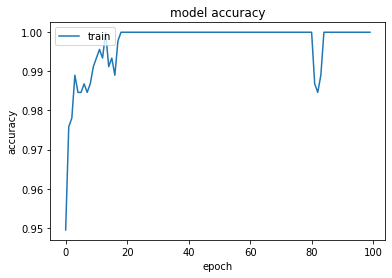

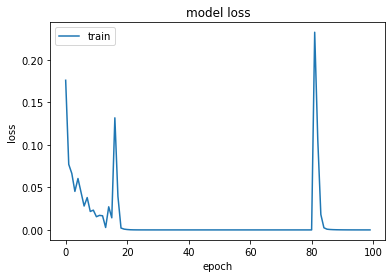

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Task 08:
**Evaluate your Neural Network to check whether the model is best fit for the given problem
and corresponding data. Print the test accuracy and test loss.
Hint: Use classifier.evaluate() function to implement this.**

In [ ]:
preds = model.evaluate(X_test, Y_test,batch_size=1)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]*100.0) + "%")

114/114 [==============================] - 0s 926us/step - loss: 0.2689 - accuracy: 0.9649
Loss = 0.26888787746429443
Test Accuracy = 96.49122953414917%


#Task 09:
**Predict your model using the predict() function and print the correctly & incorrectly
classified samples out of the total test samples.
Hint: Since you used a sigmoid function to get your output, the predicted values are
between 0 & 1. Thus in order to make them binary use 0.5 as a threshold. For instance,if
predicted output >= 0.5, y_pred = 1 else y_pred = 0.**

In [ ]:
y_pred = model.predict(X_test, batch_size=1)
y_pred = y_pred >= 0.5 
y_pred = [(1 if True in x else 0) for x in y_pred]
y_pred = np.asarray(y_pred)
Y_test = np.asarray(Y_test)
total = Y_test.shape[0]
print("Total test Samples: ",total)
correct = 0
for i in range(y_pred.shape[0]):
  if y_pred[i] == Y_test[i] :
    correct = correct + 1
print("Correctly detected: ",correct)
print("Incorrectly detected = ",total-correct)

Total test Samples:  114
Correctly detected:  110
Incorrectly detected =  4


#Task 10:
**Show the Confusion Matrix and visualize it with the help of seaborn library.**

Text(83.40000000000006, 0.5, 'True Label')

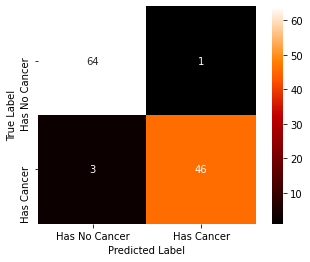

In [ ]:
mat = confusion_matrix(y_pred, Y_test)
heat = sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=True,cmap=plt.cm.gist_heat)
class_label=['Has No Cancer','Has Cancer']
heat.set_xticklabels(class_label)
heat.set_yticklabels(class_label)
heat.set_xlabel('Predicted Label')
heat.set_ylabel('True Label')